# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) although we have taken steps to pull this data into a publis s3 bucket: `s3://sta9760-yelpdataset/yelp-light/*business.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [1]:
%%info

In [2]:
sc.install_pypi_package("pandas==1.0.3")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
6,application_1638461147006_0007,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

In [3]:
sc.install_pypi_package("matplotlib==3.2.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a0/34/895006117f6fce0b4de045c87e154ee4a20c68ec0a4c9a36d900888fb6bc/pyparsing-3.0.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/6b/6e567cb2e86d4e5939a9233f8734e26021b6a9c1bc4b1edccba236a84cc2/kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl

In [4]:
sc.install_pypi_package("scipy==1.4.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/dd/82/c1fe128f3526b128cfd185580ba40d01371c5d299fcf7f77968e22dfcc2e/scipy-1.4.1-cp37-cp37m-manylinux1_x86_64.whl

In [5]:
sc.install_pypi_package("seaborn==0.11.0")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/bc/45/5118a05b0d61173e6eb12bc5804f0fbb6f196adb0a20e0b16efc2b8e98be/seaborn-0.11.0-py3-none-any.whl

In [6]:
sc.install_pypi_package("pybind11")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/a8/3b/fc246e1d4c7547a7a07df830128e93c6215e9b93dcb118b2a47a70726153/pybind11-2.8.1-py2.py3-none-any.whl

In [7]:
sc.install_pypi_package("cython")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/3d/48/bbca549da0b0f636c0f161e84d30172c40aafe99552680f297da7fedf102/Cython-0.29.24-cp37-cp37m-manylinux1_x86_64.whl

In [8]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version  
-------------------------- ---------
beautifulsoup4             4.9.1    
boto                       2.49.0   
click                      7.1.2    
cycler                     0.11.0   
Cython                     0.29.24  
jmespath                   0.10.0   
joblib                     0.16.0   
kiwisolver                 1.3.2    
lxml                       4.5.2    
matplotlib                 3.2.1    
mysqlclient                1.4.2    
nltk                       3.5      
nose                       1.3.4    
numpy                      1.16.5   
pandas                     1.0.3    
pip                        9.0.1    
py-dateutil                2.2      
pybind11                   2.8.1    
pyparsing                  3.0.6    
python-dateutil            2.8.2    
python37-sagemaker-pyspark 1.4.0    
pytz                       2020.1   
PyYAML                     5.3.1    
regex                      2020.7.14
scipy                      1.4.1    
s

## Importing

Now, import the installed packages from the previous block below.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.

In [10]:
df = spark.read.json('s3://yelpyifei/yelp/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Overview of Data

Display the number of rows and columns in our dataset.

In [11]:
print(f'Total Columns: {len(df.dtypes)}')
print(f'Total Rows: {df.count():,}')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 160,585

Display the DataFrame schema below.

In [12]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [13]:
df0 = df.select("business_id", "name", "city", "state", "categories")
df0.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+--------------------+
|         business_id|                name|       city|state|          categories|
+--------------------+--------------------+-----------+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [14]:
from pyspark.sql.functions import explode, split

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
df1 = df.select("business_id","categories")
df2 = df1.withColumn("category", explode(split("categories", ","))).drop("categories")
df2.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------+
|         business_id|     category|
+--------------------+-------------+
|6iYb2HFDywm3zjuRg...|   Gastropubs|
|6iYb2HFDywm3zjuRg...|         Food|
|6iYb2HFDywm3zjuRg...| Beer Gardens|
|6iYb2HFDywm3zjuRg...|  Restaurants|
|6iYb2HFDywm3zjuRg...|         Bars|
+--------------------+-------------+
only showing top 5 rows

Display the first 5 rows of your association table below.

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [16]:
from pyspark.sql.functions import countDistinct, count   

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
df4 = df2.groupBy("category").count()
df4.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|           category|count|
+-------------------+-----+
|     Paddleboarding|   12|
|     Dermatologists|   68|
|              Tires| 1456|
|   Historical Tours|   60|
|              Hakka|    4|
|        Hobby Shops|  135|
|         Bubble Tea|  184|
|            Tanning|  147|
|            Propane|   83|
|           Handyman|   87|
|           Macarons|   50|
|           Japanese| 2039|
| Convenience Stores| 1340|
|        Car Dealers| 1013|
|            Lawyers|  422|
|       IV Hydration|   47|
|            Rolfing|   28|
|            Falafel|   19|
|           Psychics|   62|
|    Tasting Classes|   40|
+-------------------+-----+
only showing top 20 rows

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [18]:
df4 = df2.groupBy("category").count()
df4.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|           category|count|
+-------------------+-----+
|     Paddleboarding|   12|
|     Dermatologists|   68|
|              Tires| 1456|
|   Historical Tours|   60|
|              Hakka|    4|
|        Hobby Shops|  135|
|         Bubble Tea|  184|
|            Tanning|  147|
|            Propane|   83|
|           Handyman|   87|
|           Macarons|   50|
|           Japanese| 2039|
| Convenience Stores| 1340|
|        Car Dealers| 1013|
|            Lawyers|  422|
|       IV Hydration|   47|
|            Rolfing|   28|
|            Falafel|   19|
|           Psychics|   62|
|    Tasting Classes|   40|
+-------------------+-----+
only showing top 20 rows

In [19]:
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [20]:
tu = df4.select("category", "count").toPandas()
tu1 = tu.sort_values(by=['count'], ascending=True)
tu1.tail(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                        category  count
1535               Beauty & Spas   4941
914                      Fashion   5231
1542      American (Traditional)   5235
1353                  Sandwiches   5697
734                 Coffee & Tea   5735
2217                    Shopping   6149
1267                  Automotive   6785
1350                 Active Life   7039
43                          Food   7375
2070   Event Planning & Services   7617
1840                        Bars   8914
256               Local Services   9299
2091                   Nightlife   9808
915             Health & Medical  11390
1882               Beauty & Spas  11633
2477               Home Services  12001
2282                 Restaurants  14423
60                      Shopping  20056
857                         Food  22094
770                  Restaurants  36340

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

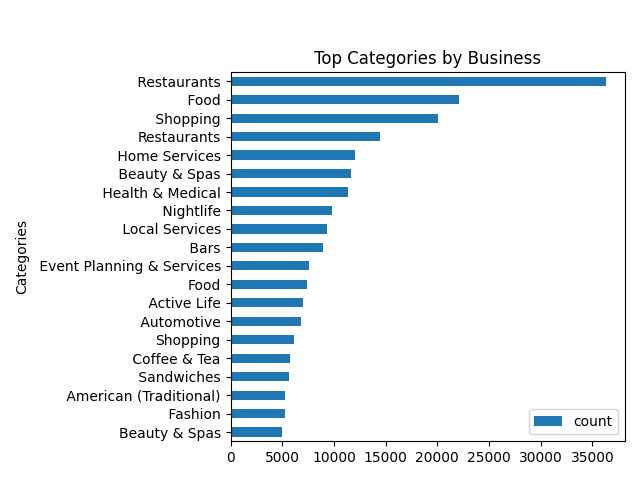

In [21]:
plt.figure()
tu1.tail(20).plot(kind="barh", x ="category")
plt.tight_layout()
plt.title('Top Categories by Business')
plt.subplots_adjust(top=0.85)
plt.ylabel('Categories')
%matplot plt

# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading Review Data

Begin by loading the review data set from S3 and printing schema to determine what data is available.

In [22]:
RE = spark.read.json('s3://yelpyifei/yelp/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
print(f'Total Columns: {len(RE.dtypes)}')
print(f'Total Rows: {RE.count():,}')


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 9
Total Rows: 8,635,403

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [25]:
RE1 = RE.select("business_id", "stars")
RE1.show(5) 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [26]:
from pyspark.sql.functions import avg
RE2 = RE.groupBy("business_id").avg("stars")
RE2.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       avg(stars)|
+--------------------+-----------------+
|uEUweopM30lHcVxjO...|              3.0|
|wdBrDCbZopowEkIEX...|4.538461538461538|
|L3WCfeVozu5etMhz4...|              4.2|
|bOnsvrz1VkbrZM1jV...|              3.8|
|R0IJhEI-zSJpYT1YN...|3.606060606060606|
+--------------------+-----------------+
only showing top 5 rows

In [27]:
from pyspark.sql.functions import desc

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [28]:
RE2 = RE2.withColumnRenamed("business_id", "busid")
RE3 = RE2.join(df0,RE2.busid ==  df0.business_id,"outer")
RE3 = RE3.drop("busid","categories")
RE3 = RE3.withColumnRenamed("business_id", "BUSID")
RE4 = RE3.join(RE1,RE3.BUSID ==  RE1.business_id,"outer")
RE4 = RE4.drop("BUSID")
RE4 = RE4.select("business_id","avg(stars)", "stars", "name" , "city", "state").distinct()
RE4.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+-----+--------------------+---------+-----+
|         business_id|       avg(stars)|stars|                name|     city|state|
+--------------------+-----------------+-----+--------------------+---------+-----+
|12h2td5XqfxeBn_Ab...|              3.5|  1.0|Little Hands Gard...| Portland|   OR|
|2zYfeL6iqah9KH221...|2.909090909090909|  1.0|           Loz Takos|Coquitlam|   BC|
|7O7qSDSVwudKkhoIq...|4.281847133757962|  2.0|    Cooks & Soldiers|  Atlanta|   GA|
|DiC4BrYgqyAACJ6x1...|4.535211267605634|  1.0|Nomad Organic Foo...|Brookline|   MA|
|DtXNthhVVeHRos3CR...|              5.0|  5.0|         Tova Health|Arlington|   MA|
+--------------------+-----------------+-----+--------------------+---------+-----+
only showing top 5 rows

Let's see a few of these:

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [29]:
Prepare = RE4.select("avg(stars)", "stars").toPandas()
Skew = (Prepare["avg(stars)"].values-Prepare["stars"].values)/Prepare["stars"].values
Skew 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array([ 3.63157895,  0.28571429, -0.16      , ..., -0.10788382,
        0.        ,  3.4375    ])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

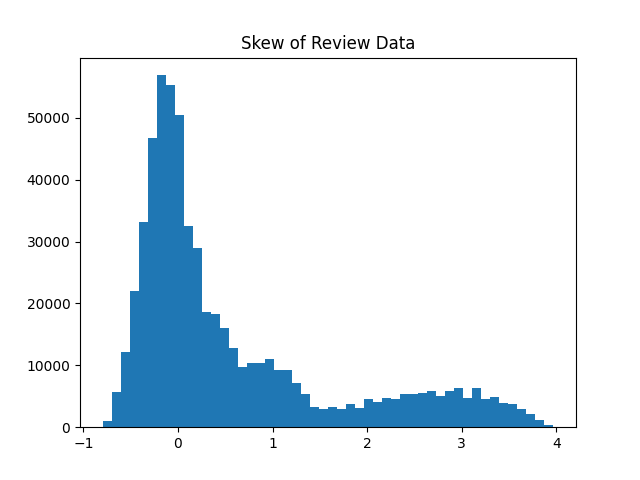

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import scipy

plt.figure()
plt.hist(Skew, bins = 50)
plt.title("Skew of Review Data")

%matplot plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

And finally, graph it!

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

# Should the Elite be Trusted? (Or, some other analysis of your choice)

For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the **Users** dataset and join on either the **business* or **reviews** dataset
* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

In [32]:
USER = spark.read.json('s3://yelpyifei/yelp/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
print(f'Yelp User Overview:')
print(f'Total Columns: {len(USER.dtypes)}')
print(f'Total Rows: {USER.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Yelp User Overview:
Total Columns: 22
Total Rows: 2,189,457

In [34]:
USER.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

In [37]:
USER1 = USER.select('user_id', 'yelping_since','elite','useful','review_count', 'average_stars','name')
USER1.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-------------------+--------------------+------+------------+-------------+
|             user_id|      yelping_since|               elite|useful|review_count|average_stars|
+--------------------+-------------------+--------------------+------+------------+-------------+
|q_QQ5kBBwlCcbL1s4...|2005-03-14 20:26:35|2006,2007,2008,20...| 15038|        1220|         3.85|
|dIIKEfOgo0KqUfGQv...|2007-08-10 19:01:51|2007,2008,2009,20...| 21272|        2136|         4.09|
|D6ErcUnFALnCQN4b1...|2007-02-07 15:47:53|           2010,2011|   188|         119|         3.76|
|JnPIjvC0cmooNDfsa...|2009-02-09 16:14:29|2009,2010,2011,20...|  7234|         987|         3.77|
|37Hc8hr3cw0iHLoPz...|2008-03-03 04:57:05|      2009,2010,2011|  1577|         495|         3.72|
+--------------------+-------------------+--------------------+------+------------+-------------+
only showing top 5 rows

In [57]:
Review1 = RE.select("business_id", "stars","user_id","funny")
Review1 = Review1.withColumnRenamed("user_id", "UID")
Review1.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+--------------------+-----+
|         business_id|stars|                 UID|funny|
+--------------------+-----+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|ak0TdVmGKo4pwqdJS...|    1|
|RA4V8pr014UyUbDvI...|  4.0|YoVfDbnISlW0f7abN...|    0|
|_sS2LBIGNT5NQb6PD...|  5.0|eC5evKn1TWDyHCyQA...|    0|
|0AzLzHfOJgL7ROwhd...|  2.0|SFQ1jcnGguO0LYWnb...|    1|
|8zehGz9jnxPqXtOc7...|  4.0|0kA0PAJ8QFMeveQWH...|    0|
+--------------------+-----+--------------------+-----+
only showing top 5 rows

In [59]:
USER2 = Review1.join(USER1,Review1.UID ==  USER1.user_id,"outer")
USER2 = USER2.drop("UID")
USER2.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+-----+--------------------+-------------------+-----+------+------------+-------------+
|         business_id|stars|funny|             user_id|      yelping_since|elite|useful|review_count|average_stars|
+--------------------+-----+-----+--------------------+-------------------+-----+------+------------+-------------+
|GgR7kcKykuqXB11fW...|  5.0|    0|--1UpCuUDJQbqiuFX...|2009-08-31 19:55:54|     |    14|          12|         2.62|
|rxNfidGLHtMYyLNeo...|  5.0|    0|--3Bk72HakneTyp3D...|2015-03-21 18:51:08|     |    11|          11|         3.67|
|bAuYOa-VuqTOnKzWN...|  2.0|    0|--3Hl2oAvTPlq-f7K...|2013-09-11 04:19:10|     |    14|          11|         2.73|
|vqQXI-Pxz3izeTUF6...|  5.0|    0|--3Hl2oAvTPlq-f7K...|2013-09-11 04:19:10|     |    14|          11|         2.73|
|2OaX6XjAoI7VD6jLd...|  2.0|    1|--3Hl2oAvTPlq-f7K...|2013-09-11 04:19:10|     |    14|          11|         2.73|
+--------------------+-----+-----+--------------------+-----------------

In [63]:
GF = USER2.select("average_stars", "stars").toPandas()
Skew1 = (GF["average_stars"].values-GF["stars"].values)/GF["stars"].values
Skew1 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array([-0.476, -0.266,  0.365, ...,  1.67 ,  0.335,  0.   ])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

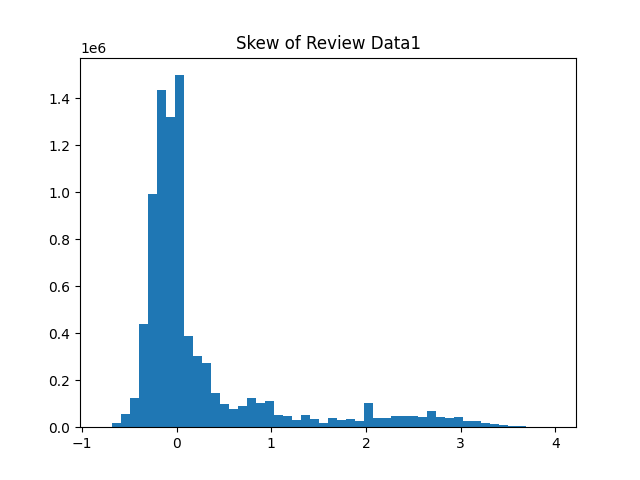

In [65]:
plt.figure()
plt.hist(Skew1, bins = 50)
plt.title("Skew of Review Data1")

%matplot plt